# BOOM BIKE RENTALS - CASE STUDY

NAME : Samriddh Lakhmani<br>
EMAIL : Samriddhlakhmani@gmail.com

#### Business Objective

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

They have contracted Us, a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

In [134]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [135]:
# importing and printing the data 

df = pd.read_csv('../day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [136]:
# We have no requiremnt of 'dteday' as feature engineering on it has been done for us
# We have no requiremnt of 'instant' as it is a identifier
# We have no requirement for acsual and registered as it is a split of the target variable and it doesnt impact our prediction

df.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [137]:
# Transforming the data to make more sense!

df.season = df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
df.mnth = df.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
df.weekday = df.weekday.map({0:'Tue',1:'Wed',2:'Thu',3:'Fri',4:'Sat',5:'Sun',6:'Mon'})
df.weathersit = df.weathersit.map({1:'Clear',
                                  2:'Mist/Cloudy',
                                  3:'LightSnow/Rain',
                                  4:'HeavySnow/Rain'})

In [138]:
df.mnth.value_counts()

Jul    62
Mar    62
May    62
Jan    62
Dec    62
Oct    62
Aug    62
Sep    60
Jun    60
Apr    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [139]:
# checking for missing values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [140]:
# checking the variable description

df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


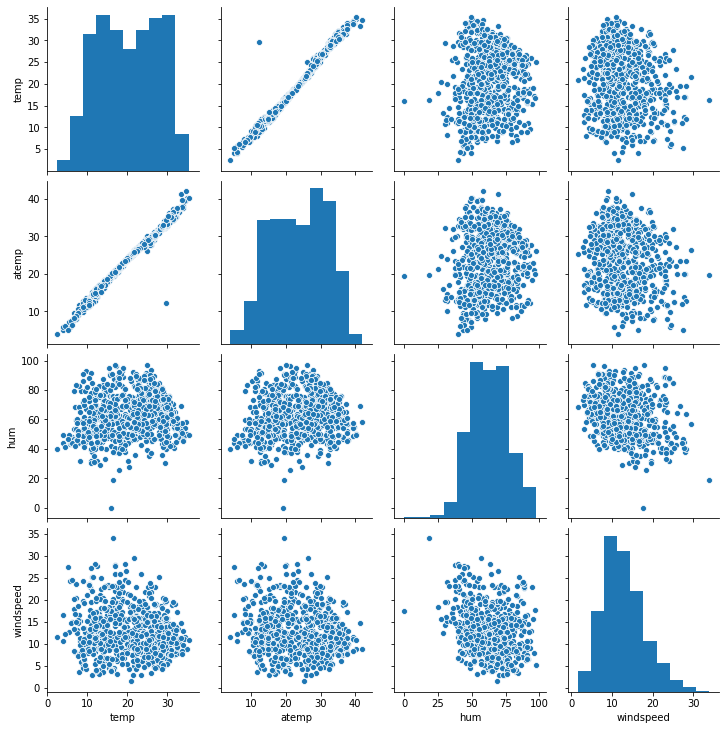

In [141]:
#printing the pair plot

sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed']])
plt.show()

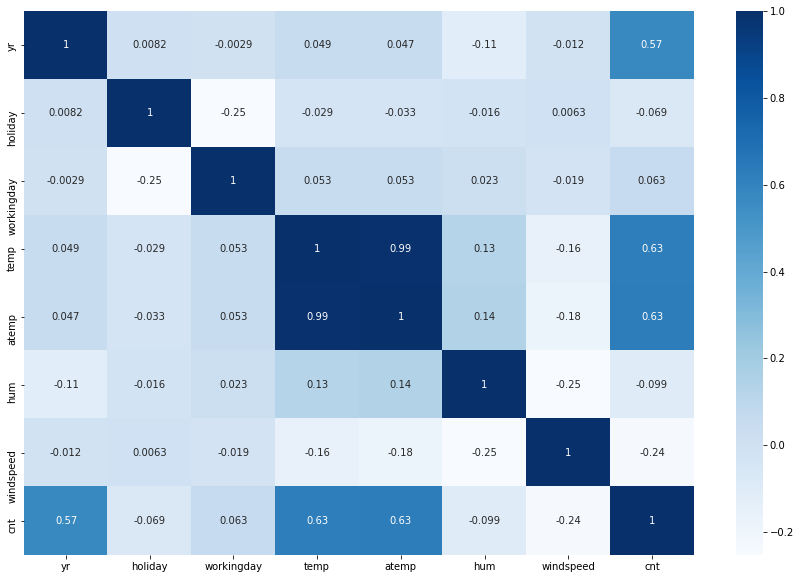

In [142]:
# plotting the correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

**Observations**
1. mnth and season are highly correlated 
1. temp and atemp are highly correlated

### Exploratory Data Analysis

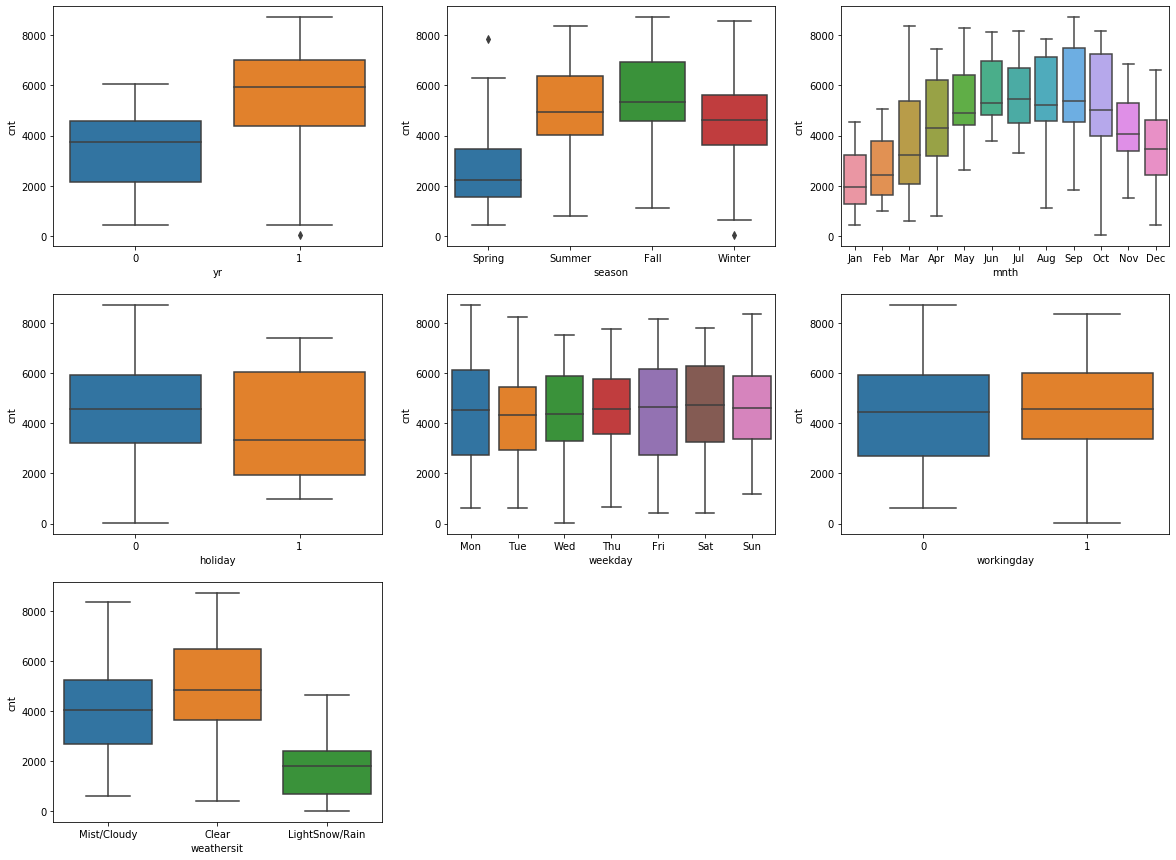

In [143]:
# Checking sales based on different categorical variables

plt.figure(figsize=(20,15))
x=1

for i in ['yr','season', 'mnth', 'holiday', 'weekday','workingday', 'weathersit']:
    plt.subplot(3,3,x)
    sns.boxplot(data=df, y='cnt',x=i)
    x+=1

#### Observations
- **season** based sales is different
    - Season 3 shows better sales
    
- Impact of **month** of sale is present. 
    - Mid Year sales are double the beginning
    
- **holiday** has a slight impact 
    - Medians are different
    
- *There is no impact of **weekday** on sales.*

- *There is no impact of **workingday** on sales*

- Drastic impact of **weathersit** on the cycle rentals
    - Season 3 has a drastic impact on sales
   

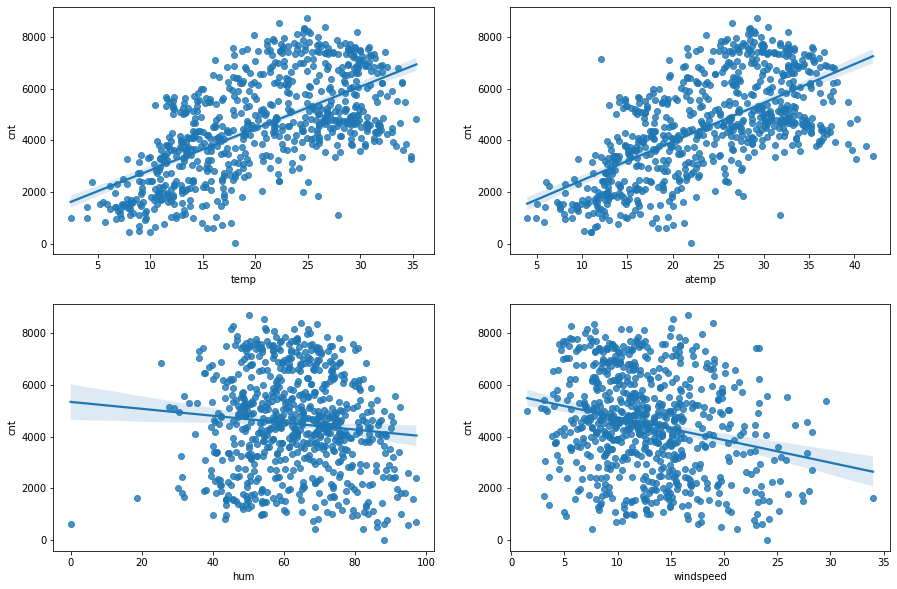

In [144]:
# plotting continuous data
plt.figure(figsize=(15,10))
x=1

for i in [ 'temp', 'atemp', 'hum', 'windspeed']:
    plt.subplot(2,2,x)
    sns.regplot(i,'cnt',df)
    x+=1

#### Observations
- ***temp*** based sales is different
    - good positive correlation
    
- Impact of ***atemp*** of sale is present. 
    - good positive correlation
    
- ***hum*** has a slight impact 
    - very weak negative correlation 
    
- Drastic impact of ***windspeed*** on the cycle rentals
    - slight negative correlation
    
**PS** : ***atemp*** and ***temp*** are highly correlated. They will have a multicolinearlity impact. Therefore, we should choose one!

### Data Preparation

* Cleaning 
* Converting dtypes 
* train test split 
* Scaling

#### One Hot Encoding (Getting Dummy Variables)

In [145]:
# seperating the nominal 
nominal = ['season','mnth','weekday','weathersit']

# converting dtype to categorical
for i in nominal:
    df[i] = df[i].apply(lambda x: str(x))

# making a new data frame with the dummy variables
df = pd.concat([df,pd.get_dummies(df[nominal],drop_first=True)],axis=1)

# dropping the columns that we have taken dummy for 
df.drop(nominal,axis=1,inplace=True)

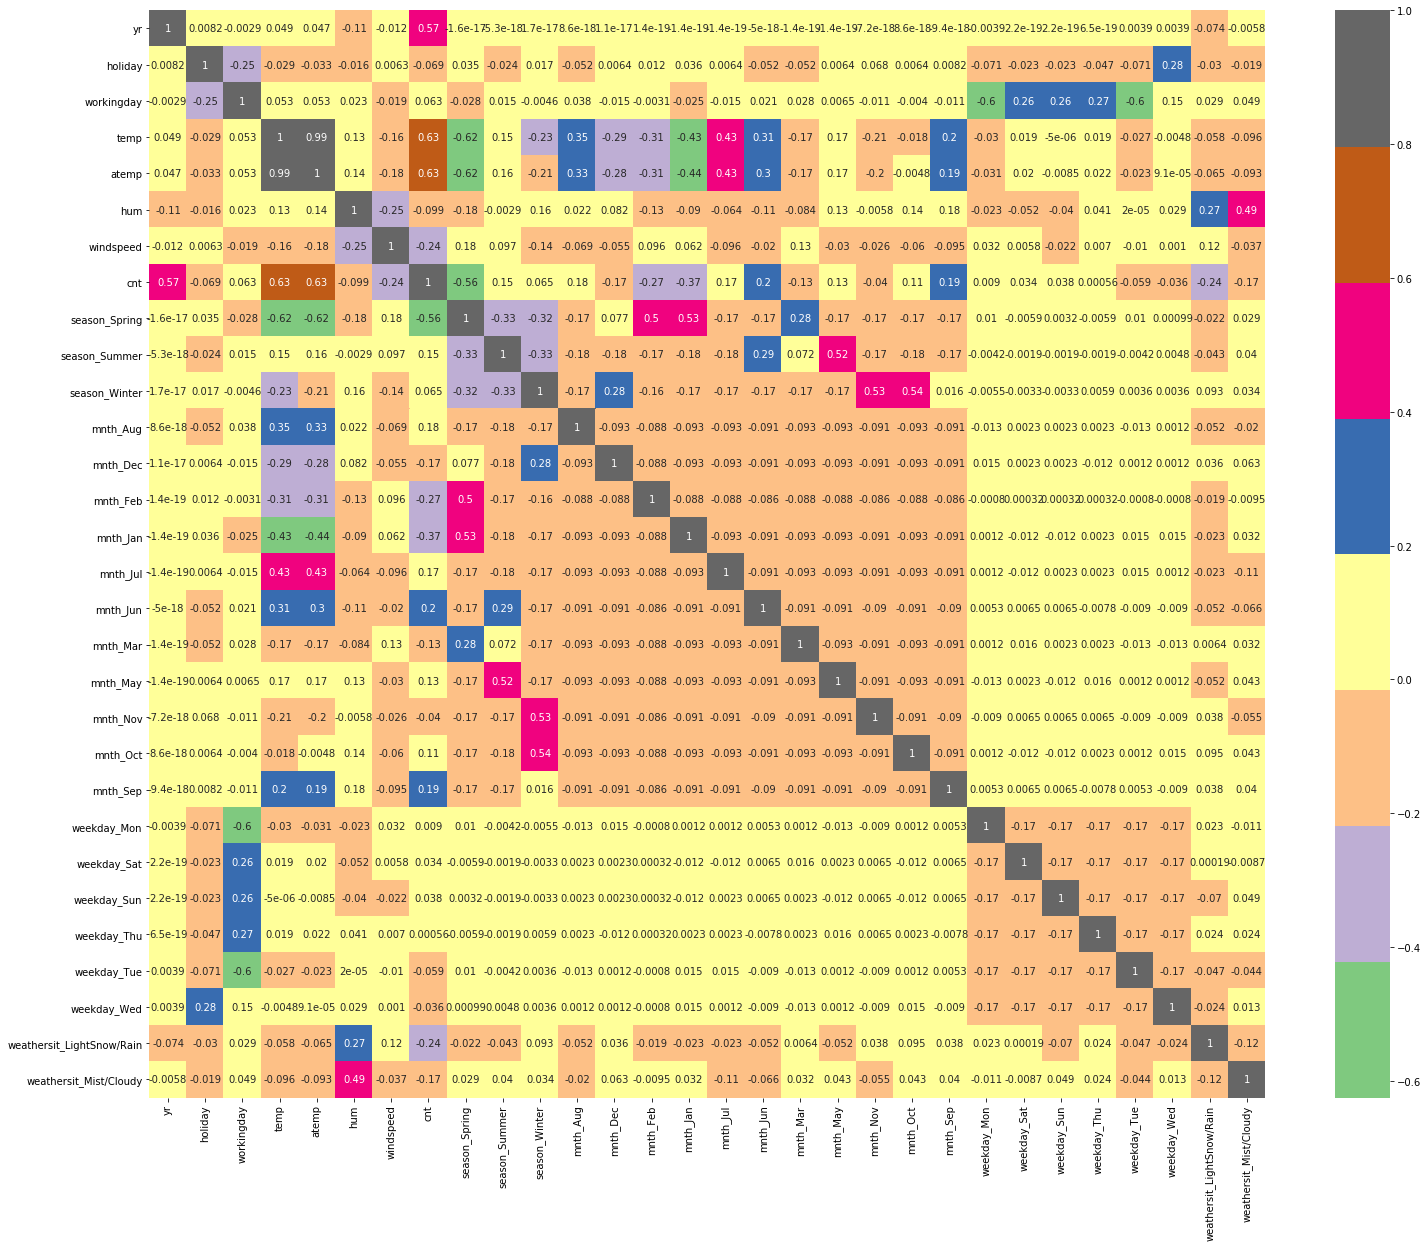

In [146]:
# plotting the correlation heatmap

plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap='Accent',annot=True)
plt.show()

In [147]:
colinearity_mat = ((df.corr()>0.4) | (df.corr()<-0.4))

In [148]:
for i in df.columns:
    print("Variable '{}' is highly correlated with".format(i),end="")
    print(df.columns[colinearity_mat[i]],"\n")

Variable 'yr' is highly correlated withIndex(['yr', 'cnt'], dtype='object') 

Variable 'holiday' is highly correlated withIndex(['holiday'], dtype='object') 

Variable 'workingday' is highly correlated withIndex(['workingday', 'weekday_Mon', 'weekday_Tue'], dtype='object') 

Variable 'temp' is highly correlated withIndex(['temp', 'atemp', 'cnt', 'season_Spring', 'mnth_Jan', 'mnth_Jul'], dtype='object') 

Variable 'atemp' is highly correlated withIndex(['temp', 'atemp', 'cnt', 'season_Spring', 'mnth_Jan', 'mnth_Jul'], dtype='object') 

Variable 'hum' is highly correlated withIndex(['hum', 'weathersit_Mist/Cloudy'], dtype='object') 

Variable 'windspeed' is highly correlated withIndex(['windspeed'], dtype='object') 

Variable 'cnt' is highly correlated withIndex(['yr', 'temp', 'atemp', 'cnt', 'season_Spring'], dtype='object') 

Variable 'season_Spring' is highly correlated withIndex(['temp', 'atemp', 'cnt', 'season_Spring', 'mnth_Feb', 'mnth_Jan'], dtype='object') 

Variable 'season_Summ

#### Dropping Variables

**Dropping due to multicolinearity!**

1. Dropping *weekday_Mon* as Workingday captures the data well
1. Dropping *weekday_Tue* as Workingday captures the data well
1. Dropping *temp* as *atemp*,*season_Spring* and *mnth_Jan* captures the data well
1. Dropping *mnth_Jan* as *season_Spring* captures the data well
1. Dropping *mnth_Feb* as *season_Spring* captures the data well
1. Dropping *mnth_Nov* as *season_Winter* captures the data well
1. Dropping *mnth_Dec* as *season_Winter* captures the data well
1. Dropping *mnth_Oct* as *season_Winter* captures the data well
1. Dropping *mnth_May* as *season_Summer* captures the data well

In [149]:
df.drop(['weekday_Mon','weekday_Tue','temp','mnth_Jan','mnth_Feb','mnth_Nov','mnth_Dec','mnth_Oct','mnth_May'],axis=1,inplace=True)

#### Train Test Split

In [150]:
#performing the train-test split 

df_train,df_test = train_test_split(df,test_size = 0.25,random_state=42)

In [151]:
#printing to check the size of the train-test split
print(df_train.shape)
print(df_test.shape)

(547, 21)
(183, 21)


#### Scaling 

In [152]:
# creating a min-max scaler instance
scaler = MinMaxScaler()

# transforming the training & testing data
df_train[df_train.columns] = scaler.fit_transform(df_train)
df_test[df_test.columns] = scaler.transform(df_test)

In [153]:
# Seperating target variable from the predictors

X_train = df_train.drop('cnt',axis=1)
y_train = df_train['cnt']
X_test = df_test.drop('cnt',axis=1)
y_test = df_test['cnt']

### Feature Selection 

In [154]:
X_train.shape

(547, 20)

In [155]:
lr = LinearRegression()
selector = RFE(lr, n_features_to_select=15, step=1)
selector.fit(X_train,y_train)

X_train = X_train[X_train.columns[selector.support_]]

In [156]:
X_train.shape

(547, 15)

### Building the Model

In [157]:
#adding constant
X_train_sm = sm.add_constant(X_train)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [158]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.68e-197
Time:                        14:24:42   Log-Likelihood:                 513.17
No. Observations:                 547   AIC:                            -994.3
Df Residuals:                     531   BIC:                            -925.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2677      0.040      6.627      0.000       0.188       0.347
yr                            0.2400      0.008     28.716      0.000       0.224       0.256
holiday                      -0.0725      0.025     -2.863      0.004      -0.122      -0.023
workingday                    0.0170      0.009      1.856      0.064      -0.001       0.035
atemp                         0.5483      0.037     14.829      0.000       0.476       0.621
hum                          -0.1787      0.039     -4.579      0.000      -0.255      -0.102
windspeed                    -0.1099      0.024     -4.509      0.000      -0.158      -0.062
season_Spring                -0.1258      0.026     -4.882      0.000      -0.176      -0.075
season_Summer                 0.0187      0.021      0.871      0.384      -0.023       0.061
season_Winter                 0.0677      0.022      3.107      0.002       0.025       0.110
mnth_Aug                     -0.0236      0.025     -0.949      0.343      -0.072       0.025
mnth_Jul                     -0.0655      0.024     -2.695      0.007      -0.113      -0.018
mnth_Mar                      0.0431      0.018      2.431      0.015       0.008       0.078
mnth_Sep                      0.0732      0.021      3.534      0.000       0.033       0.114
weathersit_LightSnow/Rain    -0.2104      0.027     -7.759      0.000      -0.264      -0.157
weathersit_Mist/Cloudy       -0.0536      0.011     -4.905      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       64.113   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.581
Skew:                          -0.713   Prob(JB):                     2.93e-26
Kurtosis:                       4.769   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [159]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.98
3,atemp,19.45
5,windspeed,5.57
7,season_Summer,5.26
6,season_Spring,5.18
8,season_Winter,4.74
2,workingday,3.30
10,mnth_Jul,2.96
9,mnth_Aug,2.49
14,weathersit_Mist/Cloudy,2.25


 #### Dropping season_Summer and cheking again

In [160]:
# Dropping hum
X_train_duplicate = X_train.drop('season_Summer',axis=1)

In [161]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [162]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.1
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.72e-198
Time:                        14:24:42   Log-Likelihood:                 512.78
No. Observations:                 547   AIC:                            -995.6
Df Residuals:                     532   BIC:                            -931.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2847      0.035      8.060      0.000       0.215       0.354
yr                            0.2401      0.008     28.736      0.000       0.224       0.257
holiday                      -0.0727      0.025     -2.872      0.004      -0.122      -0.023
workingday                    0.0171      0.009      1.863      0.063      -0.001       0.035
atemp                         0.5439      0.037     14.853      0.000       0.472       0.616
hum                          -0.1772      0.039     -4.547      0.000      -0.254      -0.101
windspeed                    -0.1093      0.024     -4.486      0.000      -0.157      -0.061
season_Spring                -0.1431      0.016     -8.765      0.000      -0.175      -0.111
season_Winter                 0.0522      0.013      4.125      0.000       0.027       0.077
mnth_Aug                     -0.0386      0.018     -2.174      0.030      -0.074      -0.004
mnth_Jul                     -0.0802      0.017     -4.586      0.000      -0.114      -0.046
mnth_Mar                      0.0444      0.018      2.510      0.012       0.010       0.079
mnth_Sep                      0.0615      0.016      3.900      0.000       0.031       0.093
weathersit_LightSnow/Rain    -0.2112      0.027     -7.796      0.000      -0.264      -0.158
weathersit_Mist/Cloudy       -0.0533      0.011     -4.883      0.000      -0.075      -0.032
==============================================================================
Omnibus:                       65.318   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.511
Skew:                          -0.722   Prob(JB):                     6.78e-27
Kurtosis:                       4.790   Cond. No.                         21.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [163]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,24.17
3,atemp,19.05
5,windspeed,4.92
2,workingday,3.28
6,season_Spring,2.71
13,weathersit_Mist/Cloudy,2.22
7,season_Winter,2.09
0,yr,2.08
9,mnth_Jul,1.68
8,mnth_Aug,1.40


In [164]:
#Satisfactory results, dropping the variable
X_train.drop('season_Summer',axis=1,inplace=True)

 #### Dropping workingday and cheking again

In [165]:
# Dropping hum
X_train_duplicate = X_train.drop('workingday',axis=1)

In [166]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [167]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     207.8
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          6.55e-199
Time:                        14:24:42   Log-Likelihood:                 511.00
No. Observations:                 547   AIC:                            -994.0
Df Residuals:                     533   BIC:                            -933.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2947      0.035      8.419      0.000       0.226       0.363
yr                            0.2401      0.008     28.665      0.000       0.224       0.257
holiday                      -0.0840      0.025     -3.407      0.001      -0.132      -0.036
atemp                         0.5505      0.037     15.070      0.000       0.479       0.622
hum                          -0.1792      0.039     -4.588      0.000      -0.256      -0.102
windspeed                    -0.1116      0.024     -4.573      0.000      -0.159      -0.064
season_Spring                -0.1422      0.016     -8.694      0.000      -0.174      -0.110
season_Winter                 0.0529      0.013      4.174      0.000       0.028       0.078
mnth_Aug                     -0.0392      0.018     -2.203      0.028      -0.074      -0.004
mnth_Jul                     -0.0821      0.017     -4.693      0.000      -0.116      -0.048
mnth_Mar                      0.0466      0.018      2.635      0.009       0.012       0.081
mnth_Sep                      0.0612      0.016      3.869      0.000       0.030       0.092
weathersit_LightSnow/Rain    -0.2096      0.027     -7.723      0.000      -0.263      -0.156
weathersit_Mist/Cloudy       -0.0524      0.011     -4.793      0.000      -0.074      -0.031
==============================================================================
Omnibus:                       71.199   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.787
Skew:                          -0.780   Prob(JB):                     3.98e-29
Kurtosis:                       4.819   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [168]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.98
2,atemp,18.26
4,windspeed,4.91
5,season_Spring,2.67
12,weathersit_Mist/Cloudy,2.22
0,yr,2.08
6,season_Winter,2.08
8,mnth_Jul,1.67
7,mnth_Aug,1.40
10,mnth_Sep,1.28


In [169]:
#Satisfactory results, dropping the variable
X_train.drop('workingday',axis=1,inplace=True)

 #### Dropping hum and cheking again

In [170]:
# Dropping hum
X_train_duplicate = X_train.drop('hum',axis=1)

In [171]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [172]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     215.2
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          1.27e-195
Time:                        14:24:42   Log-Likelihood:                 500.41
No. Observations:                 547   AIC:                            -974.8
Df Residuals:                     534   BIC:                            -918.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1922      0.027      7.001      0.000       0.138       0.246
yr                            0.2453      0.008     29.022      0.000       0.229       0.262
holiday                      -0.0842      0.025     -3.354      0.001      -0.134      -0.035
atemp                         0.5191      0.037     14.202      0.000       0.447       0.591
windspeed                    -0.0795      0.024     -3.339      0.001      -0.126      -0.033
season_Spring                -0.1473      0.017     -8.858      0.000      -0.180      -0.115
season_Winter                 0.0453      0.013      3.539      0.000       0.020       0.070
mnth_Aug                     -0.0377      0.018     -2.077      0.038      -0.073      -0.002
mnth_Jul                     -0.0728      0.018     -4.117      0.000      -0.108      -0.038
mnth_Mar                      0.0521      0.018      2.897      0.004       0.017       0.087
mnth_Sep                      0.0545      0.016      3.397      0.001       0.023       0.086
weathersit_LightSnow/Rain    -0.2634      0.025    -10.571      0.000      -0.312      -0.214
weathersit_Mist/Cloudy       -0.0819      0.009     -9.108      0.000      -0.100      -0.064
==============================================================================
Omnibus:                       65.597   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.117
Skew:                          -0.730   Prob(JB):                     1.36e-26
Kurtosis:                       4.759   Cond. No.                         16.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,6.47
3,windspeed,4.85
0,yr,2.08
4,season_Spring,1.74
7,mnth_Jul,1.60
11,weathersit_Mist/Cloudy,1.55
5,season_Winter,1.51
6,mnth_Aug,1.39
9,mnth_Sep,1.28
8,mnth_Mar,1.17


In [174]:
#Satisfactory results, dropping the variable
X_train.drop('hum',axis=1,inplace=True)

 #### Dropping atemp and cheking again

In [175]:
# Dropping hum
X_train_duplicate = X_train.drop('atemp',axis=1)

In [176]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [177]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     157.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          9.45e-160
Time:                        14:24:42   Log-Likelihood:                 412.77
No. Observations:                 547   AIC:                            -801.5
Df Residuals:                     535   BIC:                            -749.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.5267      0.017     31.820      0.000       0.494       0.559
yr                            0.2521      0.010     25.477      0.000       0.233       0.272
holiday                      -0.0969      0.029     -3.292      0.001      -0.155      -0.039
windspeed                    -0.1339      0.028     -4.861      0.000      -0.188      -0.080
season_Spring                -0.3130      0.014    -22.547      0.000      -0.340      -0.286
season_Winter                -0.0398      0.013     -2.999      0.003      -0.066      -0.014
mnth_Aug                      0.0401      0.020      1.979      0.048       0.000       0.080
mnth_Jul                      0.0337      0.019      1.794      0.073      -0.003       0.071
mnth_Mar                      0.0552      0.021      2.620      0.009       0.014       0.097
mnth_Sep                      0.1056      0.018      5.763      0.000       0.070       0.142
weathersit_LightSnow/Rain    -0.2854      0.029     -9.784      0.000      -0.343      -0.228
weathersit_Mist/Cloudy       -0.0874      0.011     -8.290      0.000      -0.108      -0.067
==============================================================================
Omnibus:                       49.965   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.490
Skew:                          -0.620   Prob(JB):                     3.33e-18
Kurtosis:                       4.412   Cond. No.                         8.89
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.90
0,yr,1.90
3,season_Spring,1.64
10,weathersit_Mist/Cloudy,1.51
4,season_Winter,1.48
6,mnth_Jul,1.16
7,mnth_Mar,1.16
5,mnth_Aug,1.14
8,mnth_Sep,1.12
9,weathersit_LightSnow/Rain,1.09


###### NOTE :

Dropping atemp has a huge impact on the r2 of the model. 
1. This is because **atemp** is very highly correlated with the *cnt*
1. But atemp has a high VIF... 

So We will include atemp in our model!
But we will remove other varibale highly correlated to atemp, such that its VIF is below acceptable standards!

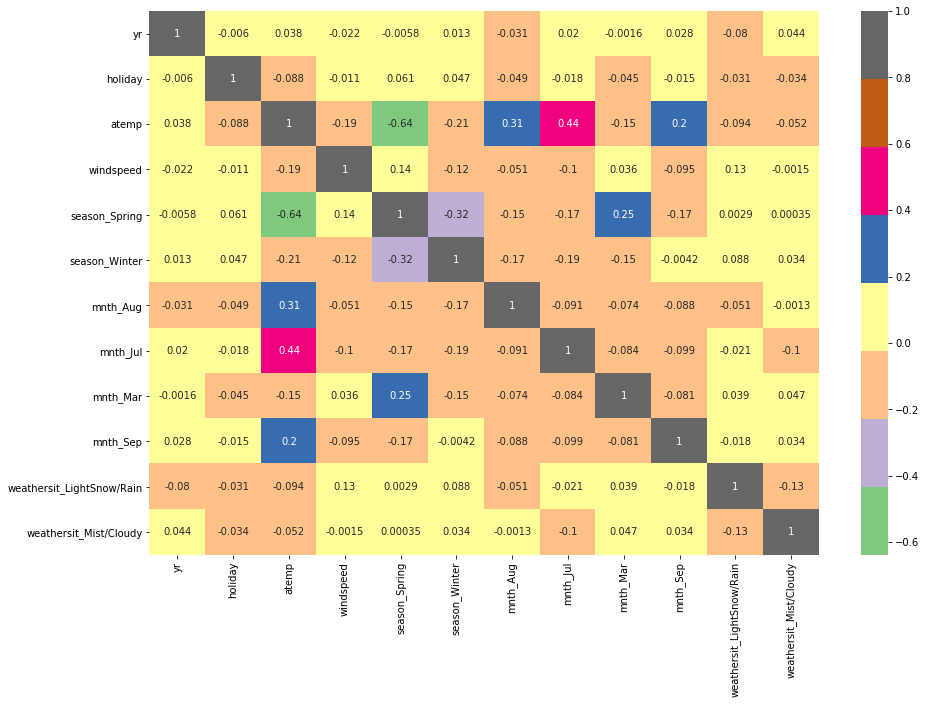

In [179]:
# plotting the correlation heatmap

plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),cmap='Accent',annot=True)
plt.show()

We had to choose between - season_Spring, mnth_Jul, mnth_Aug, mnth_Sep

Lets drop : 
* mnth_Jul since it has a low coeff and high p-value

 #### Dropping mnth_Jul  and cheking again

In [180]:
# Dropping hum
X_train_duplicate = X_train.drop('mnth_Jul',axis=1)

In [181]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [182]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     226.5
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.35e-193
Time:                        14:24:44   Log-Likelihood:                 491.87
No. Observations:                 547   AIC:                            -959.7
Df Residuals:                     535   BIC:                            -908.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2131      0.027      7.784      0.000       0.159       0.267
yr                            0.2453      0.009     28.606      0.000       0.228       0.262
holiday                      -0.0853      0.025     -3.350      0.001      -0.135      -0.035
atemp                         0.4553      0.034     13.554      0.000       0.389       0.521
windspeed                    -0.0743      0.024     -3.079      0.002      -0.122      -0.027
season_Spring                -0.1546      0.017     -9.213      0.000      -0.188      -0.122
season_Winter                 0.0490      0.013      3.777      0.000       0.024       0.074
mnth_Aug                     -0.0131      0.017     -0.751      0.453      -0.047       0.021
mnth_Mar                      0.0584      0.018      3.216      0.001       0.023       0.094
mnth_Sep                      0.0725      0.016      4.631      0.000       0.042       0.103
weathersit_LightSnow/Rain    -0.2668      0.025    -10.556      0.000      -0.316      -0.217
weathersit_Mist/Cloudy       -0.0797      0.009     -8.752      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       73.991   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.697
Skew:                          -0.813   Prob(JB):                     9.29e-30
Kurtosis:                       4.796   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [183]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.70
2,atemp,4.68
0,yr,2.08
4,season_Spring,1.74
10,weathersit_Mist/Cloudy,1.54
5,season_Winter,1.42
6,mnth_Aug,1.25
8,mnth_Sep,1.19
7,mnth_Mar,1.16
9,weathersit_LightSnow/Rain,1.09


In [184]:
#Satisfactory results, dropping the variable
X_train.drop('mnth_Jul',axis=1,inplace=True)

 #### Dropping mnth_Aug and cheking again

In [185]:
# Dropping hum
X_train_duplicate = X_train.drop('mnth_Aug',axis=1)

In [186]:
#adding constant
X_train_sm = sm.add_constant(X_train_duplicate)

#Building the model
lm = sm.OLS(y_train,X_train_sm).fit()

In [187]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     249.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.74e-194
Time:                        14:24:44   Log-Likelihood:                 491.58
No. Observations:                 547   AIC:                            -961.2
Df Residuals:                     536   BIC:                            -913.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2140      0.027      7.824      0.000       0.160       0.268
yr                            0.2456      0.009     28.673      0.000       0.229       0.262
holiday                      -0.0849      0.025     -3.334      0.001      -0.135      -0.035
atemp                         0.4505      0.033     13.665      0.000       0.386       0.515
windspeed                    -0.0739      0.024     -3.066      0.002      -0.121      -0.027
season_Spring                -0.1545      0.017     -9.211      0.000      -0.187      -0.122
season_Winter                 0.0499      0.013      3.868      0.000       0.025       0.075
mnth_Mar                      0.0592      0.018      3.268      0.001       0.024       0.095
mnth_Sep                      0.0744      0.015      4.821      0.000       0.044       0.105
weathersit_LightSnow/Rain    -0.2666      0.025    -10.552      0.000      -0.316      -0.217
weathersit_Mist/Cloudy       -0.0799      0.009     -8.779      0.000      -0.098      -0.062
==============================================================================
Omnibus:                       72.546   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.072
Skew:                          -0.799   Prob(JB):                     3.45e-29
Kurtosis:                       4.788   Cond. No.                         15.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

#### $ VIF_i = \frac{1}{1 - {R_i}^2} $


In [188]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_duplicate.columns
vif['VIF'] = [variance_inflation_factor(X_train_duplicate.values, i) for i in range(X_train_duplicate.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.69
2,atemp,4.20
0,yr,2.07
4,season_Spring,1.73
9,weathersit_Mist/Cloudy,1.54
5,season_Winter,1.39
6,mnth_Mar,1.16
7,mnth_Sep,1.16
8,weathersit_LightSnow/Rain,1.09
1,holiday,1.04


In [189]:
#Satisfactory results, dropping the variable
X_train.drop('mnth_Aug',axis=1,inplace=True)

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [190]:
# making the predictions 
y_train_pred = lm.predict(X_train_sm)

#Calculating the residuals
res=(y_train - y_train_pred)

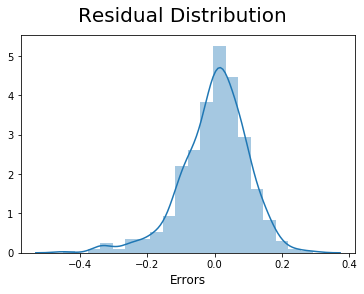

In [191]:
# Plot the histogram of the residuals terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Residual Distribution', fontsize = 20)              
plt.xlabel('Errors', fontsize = 12)     

plt.show()

In [192]:
# Confirming the mean
print('The mean is: ', np.mean(res))

The mean is:  2.1844196165499537e-16


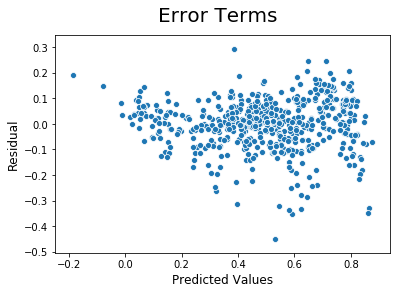

In [193]:
# Plot the scatterplot of the error vs predicted values to check for paterns/auto correlations and Variance

fig = plt.figure()
sns.scatterplot(y_train_pred,res)
fig.suptitle('Error Terms', fontsize = 20)              
plt.xlabel('Predicted Values', fontsize = 12) 
plt.ylabel('Residual', fontsize = 12) 

plt.show()

In [194]:
# Check Variance across categorical variables 

temp = X_train.copy()
temp['res'] = res
temp.drop(['windspeed','atemp'],axis=1,inplace=True)

for i in temp.columns[:-1]:
    print('mean of residuals when {}'.format(i), temp[temp[i]==1]['res'].mean())
    print('mean of residuals when not {}'.format(i), temp[temp[i]==0]['res'].mean(),end="\n\n")   

mean of residuals when yr 3.5562444234017825e-16
mean of residuals when not yr 6.949407379519209e-17

mean of residuals when holiday 1.491862189340054e-16
mean of residuals when not holiday 2.2230595686114834e-16

mean of residuals when season_Spring 1.3655743202889425e-17
mean of residuals when not season_Spring 2.7781884218108184e-16

mean of residuals when season_Winter 2.3592239273284576e-16
mean of residuals when not season_Winter 2.1263362351236106e-16

mean of residuals when mnth_Mar 8.405974329304756e-17
mean of residuals when not mnth_Mar 2.2676088437534325e-16

mean of residuals when mnth_Sep 3.8510861166685117e-16
mean of residuals when not mnth_Sep 2.0296612308903788e-16

mean of residuals when weathersit_LightSnow/Rain 5.387847031269142e-17
mean of residuals when not weathersit_LightSnow/Rain 2.2461068644421207e-16

mean of residuals when weathersit_Mist/Cloudy 1.3818733391610992e-16
mean of residuals when not weathersit_Mist/Cloudy 2.586912423673937e-16



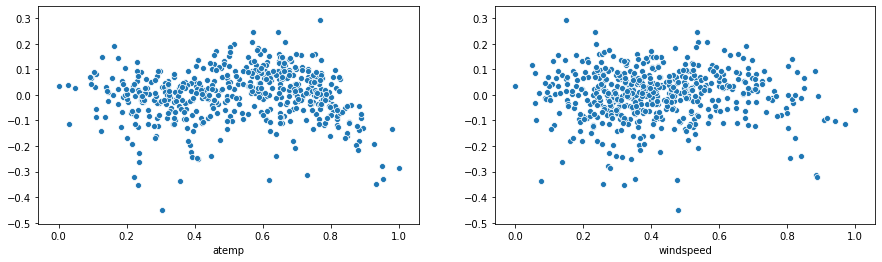

In [195]:
# Confirming no-variance along the indipendent continues variables

plt.figure(figsize=(15,4))
x=1
for i in ['atemp','windspeed']:
    plt.subplot(1,2,x)
    sns.scatterplot(y=res,x=X_train[i])
    x+=1

Confirmed : 
1. Error terms are normally distributed 
1. Error terms are indipendent of each other (no pattern)
1. Error terms are showing Uniform Variance

### Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [196]:
X_test = X_test[X_train.columns]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

# Making predictions using the fourth model
y_test_pred = lm.predict(X_test_sm)

### Model Evaluation

Let's now plot the graph for actual versus predicted values.

In [197]:
#printing the r2 score of the model to check the model fit 
from sklearn.metrics import r2_score

r2_score(y_test,y_test_pred)

0.8130630140671429

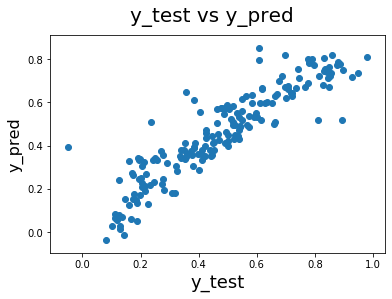

In [198]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

We can see that the equation of our best fitted line is:

$ cnt = 0.2140 + 0.4505  \times  atemp - 0.2666  \times  LightSnow/Rain + 0.2456 \times yr  + 0.1545 \times seasonSpring + 0.0849 \times holiday + 0.0799 \times weathersitMist/Cloudy + 0.0739 \times windspeed + 0.0499 \times seasonWinter + 0.0592 \times mnthMar + 0.0744 \times mnthSep $

### Important factors impacting the  parameters

- Feels like tempertature has a positive impact on the number of rentals
- Light Snow or Rain has a negative impact on the number of rentals
- The year makes a huge impact 
- There are higher sales in Spring Season